In [2]:
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [3]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 0


IndexError: list index out of range

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11493376/11490434 [==============================] - 4s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


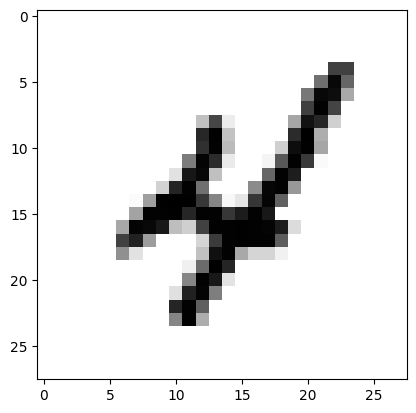

In [5]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

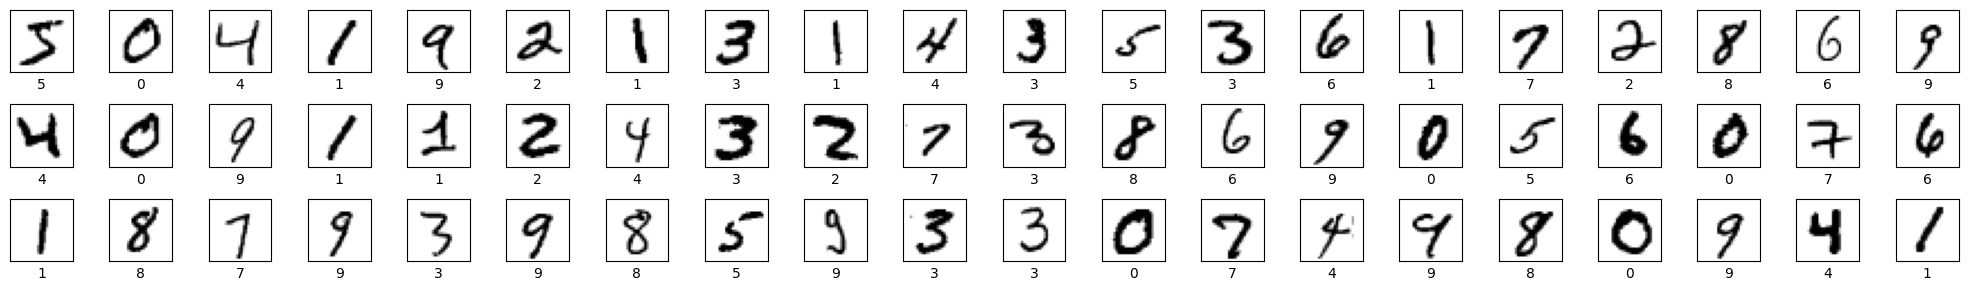

In [6]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [7]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

Image (#11): Which is digit '5'


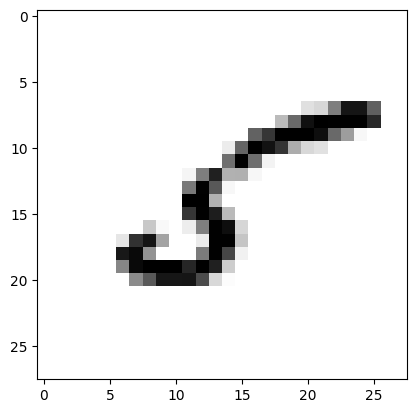

In [9]:
digit = 11 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [71]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=1024, activation='relu'),
    layers.Dense(units=768, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='elu'),
    layers.Dense(units=64, activation='tanh'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_85 (Dense)             (None, 768)               787200    
_________________________________________________________________
dense_86 (Dense)             (None, 512)               393728    
_________________________________________________________________
dense_87 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_88 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_89 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_90 (Dense)             (None, 10)              

In [72]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [100]:
h = model.fit(x=x_train, y=y_train, epochs=20, batch_size=10000, validation_split=0.5)


Epoch 1/20
3/3 [==============================] - 2s 503ms/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.1035 - val_accuracy: 0.9732
Epoch 2/20
3/3 [==============================] - 1s 403ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.1036 - val_accuracy: 0.9734
Epoch 3/20
3/3 [==============================] - 1s 394ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.1042 - val_accuracy: 0.9734
Epoch 4/20
3/3 [==============================] - 1s 411ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.1046 - val_accuracy: 0.9731
Epoch 5/20
3/3 [==============================] - 1s 398ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.1046 - val_accuracy: 0.9732
Epoch 6/20
3/3 [==============================] - 1s 415ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1045 - val_accuracy: 0.9733
Epoch 7/20
3/3 [==============================] - 1s 402ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1052 - val_accuracy: 0.9736
Epoch 8/20
3/3 [====

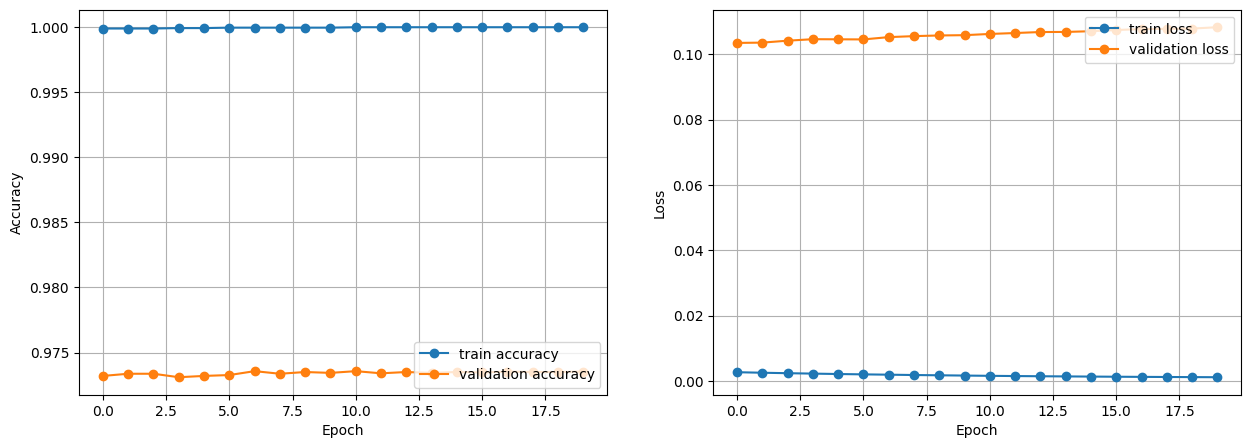

In [101]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [102]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0858 - accuracy: 0.9786

Test accuracy: 0.978600025177002


In [103]:
predictions = model.predict(x_test)


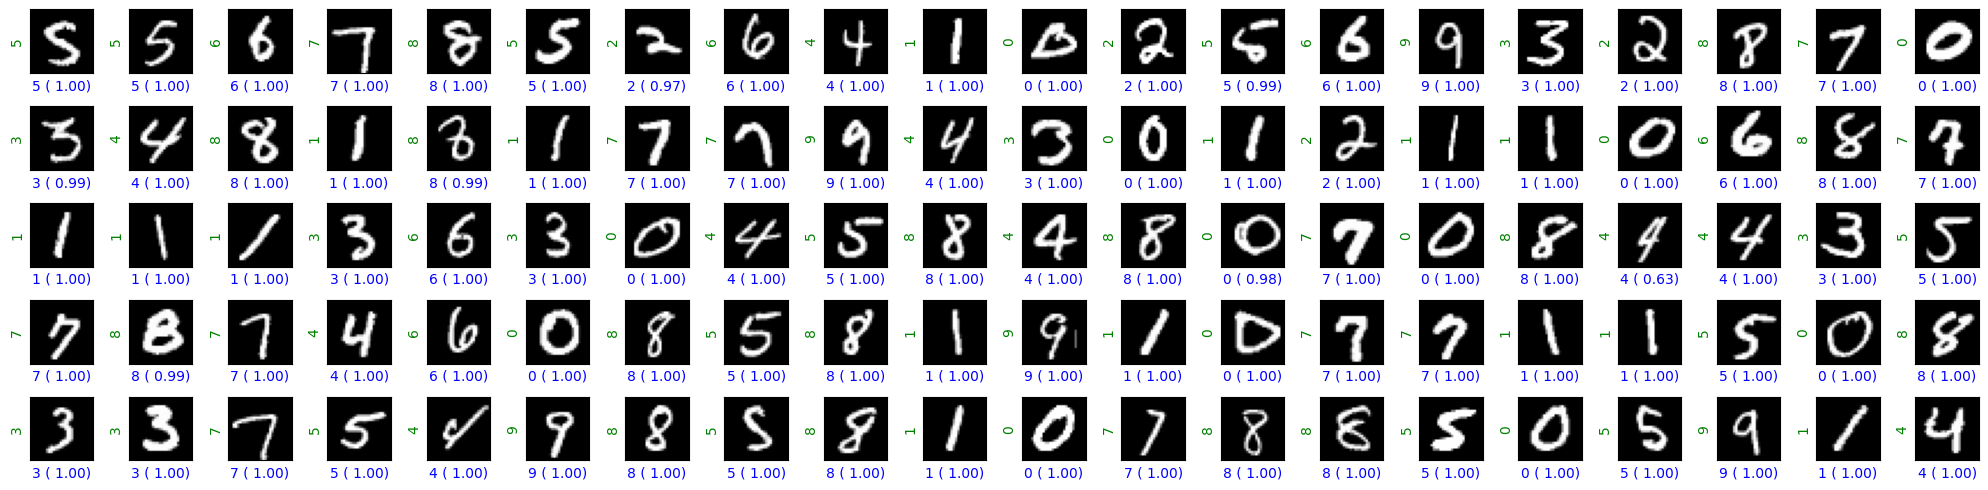

In [104]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [87]:
def test(i):
    img = x_test[i]
    predictions = model.predict([img.reshape(-1,784)])

    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel(f"True Label: {y_test[i]}", color='g') # ground truth

    prediction = np.argmax(predictions) 
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='b')
    else:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='r')
    plt.show()

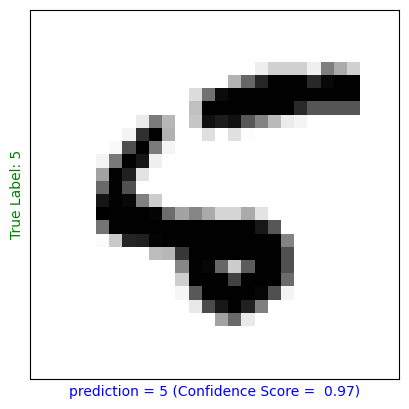

In [88]:
test(8)

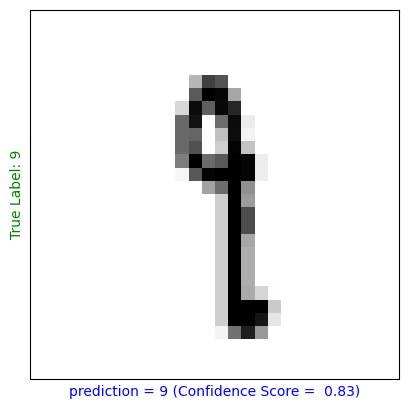

In [89]:
test(4500)

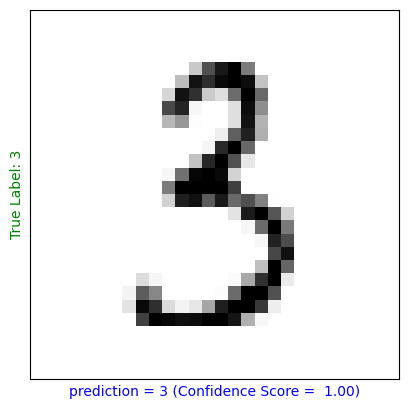

In [90]:
test(76)


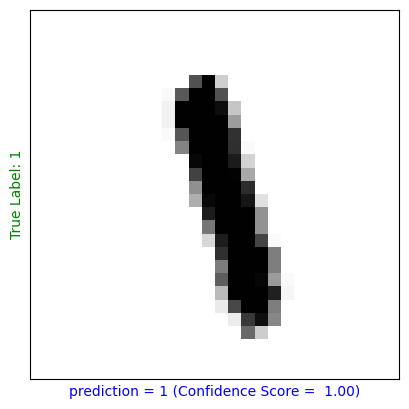

In [91]:
test(2166)

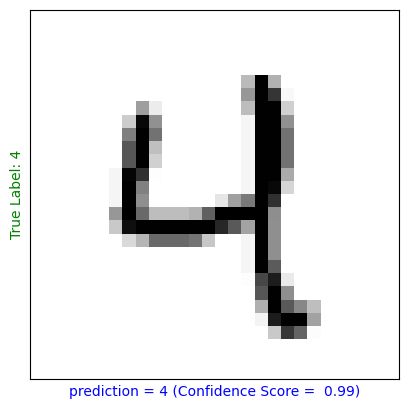

In [92]:
test(3232)

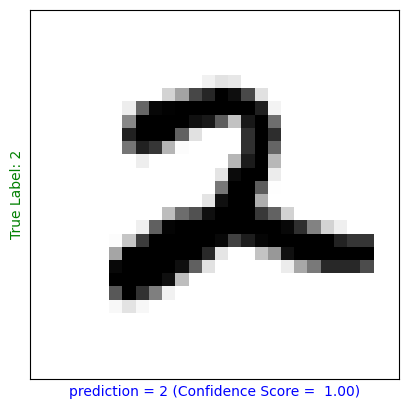

In [93]:
test(6754)

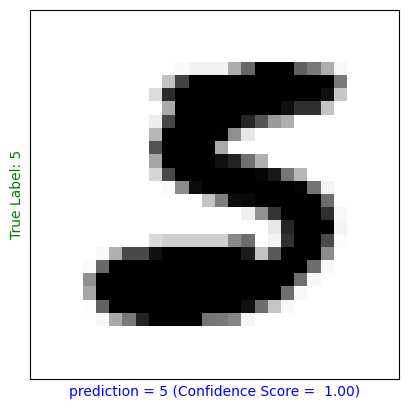

In [94]:
test(7777)

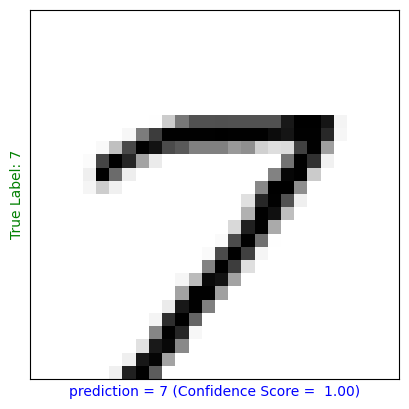

In [95]:
test(6666)

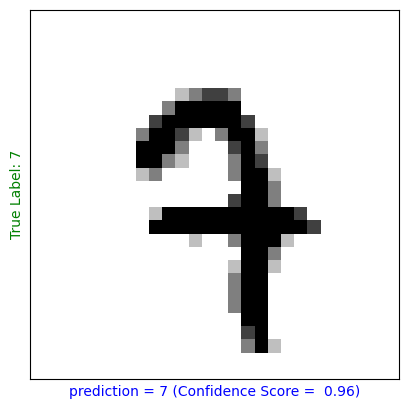

In [96]:
test(3333)

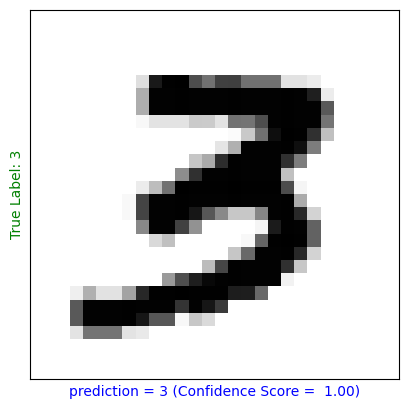

In [97]:
test(6767)

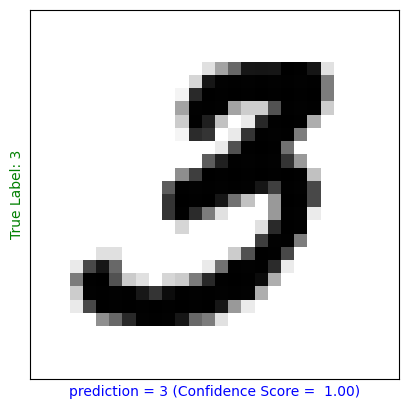

In [98]:
test(5454)

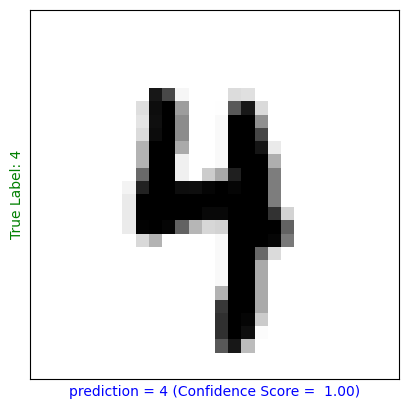

In [99]:
test(7293)

In [ ]:
test()